In [1]:
""" 
    The Project was done using google drive.
    This cell is for mounting the drive.
    Mount the drive 
"""

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
""" 
    Loading credentials for twitter API auth.
    Read the credentials from credentials.txt and
    place them into the `cred` dictionary
"""

cred = {}
cred_filepath = "drive/My Drive/Colab Notebooks/SSM Project/credentials.txt"
credfile = open(cred_filepath,"r")
for line in credfile:
    (k, val) = line.split(":")
    cred[k] = val.strip()
credfile.close()
#print(cred)

In [ ]:
""" Create OAuth handler and assigning it to API object """

import tweepy
auth = tweepy.OAuthHandler(cred["key"], cred["secret_key"])
auth.set_access_token(cred["token"],cred["token_secret"] )

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
""" Declaring Variables containing shortened Team Names that will be used to for hashtags """
''' Didn't use as can only gather last 7 days data '''


# groups =[["BAY","ATM","LMO","SAL"],
#          ["MGB","RMA","SHK","INT"],
#          ["MCI","POR","OLY","MAR"],
#          ["LIV","AJX","ATA","MID"],
#          ["CHE","SEV","KRA","REN"],
#          ["BVB","LAZ","BRU","ZEN"],
#          ["BAR","JUV","DKV","FER"],
#          ["MUN","PSG","RBL","IBFK"] ]

# matchTags = []
# for group in groups:
#     temp = []
#     for team1 in group:
#         for team2 in group:
#             if team1 != team2:
#                 hashtag = "#" + team1 + team2
#                 temp.append(hashtag)
#     matchTags.append(temp)

# for group in matchTags:
#     print(group)

In [2]:
import pandas as pd
import numpy as np


In [5]:
# First set of matches
matches1 = ['#RENCHE','#INTRMA','#KRASEV', '#BVBBRU', '#LAZZEN', '#DKVBAR', '#JUVFER', '#MUNIFBK', '#PSGRBL', '#MGBSHK', '#OLYMCI', '#ATMLMO', '#BAYSAL', '#MARPOR', '#AJXMID', '#LIVATA'] 
# Second set of matches
matches2 = ['#LMOSAL','#SHKRMA','#ATMBAY','#MGBINT','#MAROLY','#PORMCI','#ATAMID','#LIVAJX', '#KRAREN','#IBFKRBL','#BRUZEN','#BVBLAZ','#FERBAR','#JUVDKV','#MUNPSG','#SEVCHE']


In [ ]:
''' Get Those TWEEETSSSSS '''
# Make sure to use the required list of matches below for columns
df = pd.DataFrame(columns=matches2)
# The number of max tweets to fetch for a match
max_tweets = 10000   
tweet_count = []
maxC = 0
tempDict = {}
# Use the required matches list
for match in matches2:
    tweet_list = []
    c = 0
    currMatch = [match]
    for status in tweepy.Cursor(api.search, q=match, count=100).items(max_tweets):
        c += 1
        tweet_list.append(status.created_at)

    print("TOTAL ",c)
    tweet_count.append(c)
    tempDict[match] = tweet_list

df = pd.DataFrame({ key:pd.Series(value) for key, value in tempDict.items() }, dtype='datetime64[s]')

In [ ]:
''' Commented to prevent Accidentally running this Cell and overwriting
    SAVE THE DATA TO FILES
'''
# # Make sure to change this path before running again to prevent overwriting
# csv_tweetfilepath = "drive/My Drive/Colab Notebooks/SSM Project/tweetTimes2.csv"
# df.to_csv(csv_tweetfilepath) 
# # Make sure to change this path before running again to prevent overwriting
# tweetcount_filepath = "drive/My Drive/Colab Notebooks/SSM Project/tweetcount2.txt"

# with open(tweetcount_filepath, 'w') as countfile:
#     for match, count in zip(matches, tweet_count):
#         countfile.write(match + " = " + str(count)+"\n")


In [3]:
import matplotlib.pyplot as plt

In [ ]:
''' SOME GRAPHING TRIALS '''
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# matches = ['#RENCHE','#INTRMA','#KRASEV', '#BVBBRU', '#LAZZEN', '#DKVBAR', '#JUVFER', '#MUNIFBK', '#PSGRBL', '#MGBSHK', '#OLYMCI', '#ATMLMO', '#BAYSAL', '#MARPOR', '#AJXMID', '#LIVATA'] 
# tweet_count1 = [10000, 4114, 443, 920,  131,  454,  733,  13,  10000,  1,  3636,  58,  151,  97,  134,  10000]
# ax.bar(matches,tweet_count1)
# for i, v in enumerate(tweet_count1):
#     ax.text(i - 0.5, v + 30, str(v), color='green', fontweight='bold')
# plt.xticks(np.arange(0,16, step=1), matches, rotation=70)
# fig.show()
# # image_filepath = "drive/My Drive/Colab Notebooks/SSM Project/tweetsNov29.png"
# # fig.savefig(image_filepath, bbox_inches="tight")

In [6]:
''' Loading the data '''
tweetfile1 = "drive/My Drive/Colab Notebooks/SSM Project/tweetTimes.csv"
tweetfile2 = "drive/My Drive/Colab Notebooks/SSM Project/tweetTimes2.csv"
tweet_df1 = pd.read_csv (tweetfile1, parse_dates=matches1)
tweet_df2 = pd.read_csv (tweetfile2, parse_dates=matches2)
match_times1 = ['11/24 17:55', '11/24 17:55', '11/24 20:00', '11/24 20:00', '11/24 20:00', '11/24 20:00', '11/24 20:00', '11/24 20:00', '11/25 17:55', '11/25 17:55', '11/25 20:00', '11/25 20:00', '11/25 20:00', '11/25 20:00', '11/25 20:00', '11/25 20:00']
match_times2 = ['12/01 17:55', '12/01 17:55', '12/01 20:00', '12/01 20:00', '12/01 20:00', '12/01 20:00', '12/01 20:00', '12/01 20:00', '12/02 17:55', '12/02 17:55', '12/02 20:00', '12/02 20:00', '12/02 20:00', '12/02 20:00', '12/02 20:00', '12/02 20:00']

# print(tweet_df1.dtypes)
# print(tweet_df2.dtypes)


In [ ]:
''' For week 1 i.e. matches on the dates 11/24 and 11/25 '''

for match, time in zip(matches1, match_times1):  
    tempDF = tweet_df1[[match]]
    tempDF.rename(columns={match:'date'}, inplace = True)
    # print(tempDF['date'])
    tempDF = tempDF.assign(date=tempDF.date.dt.round('3h'))
    # print(tempDF)
    ax = tempDF.groupby([tempDF["date"].dt.day,tempDF["date"].dt.hour]).count().plot(figsize= (10,5),kind="bar", width= 0.9)
    ax.text(0.89, 0.85, "Kick-Off: " + time , ha='center', va='center', transform=ax.transAxes)
    ax.legend([match,]);
    pathname = "drive/My Drive/Colab Notebooks/SSM Project/Week1_Images/" + match.strip('#') +".png"
    ax.figure.savefig(pathname, bbox_inches="tight")

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


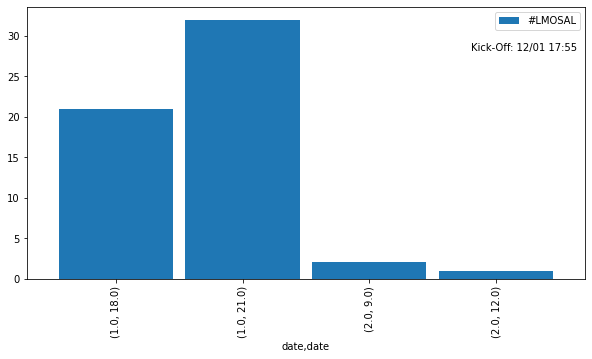

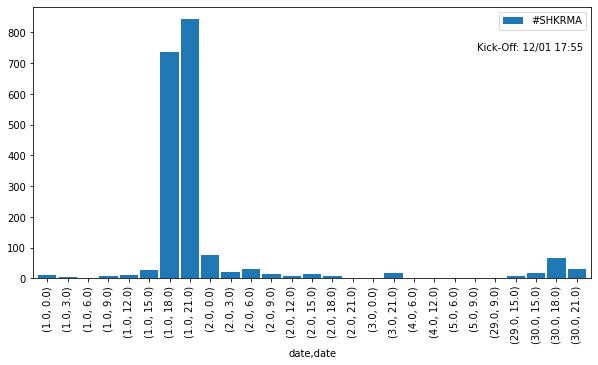

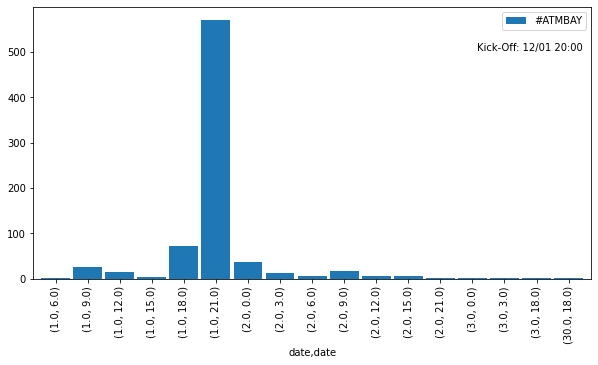

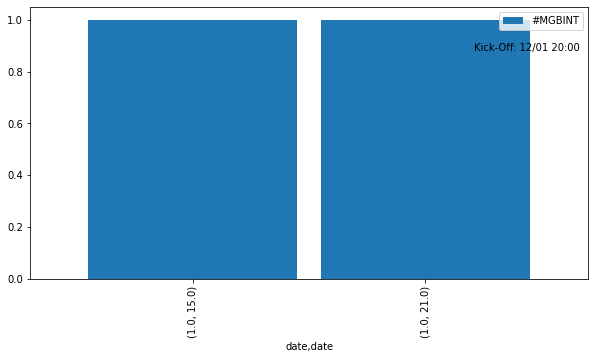

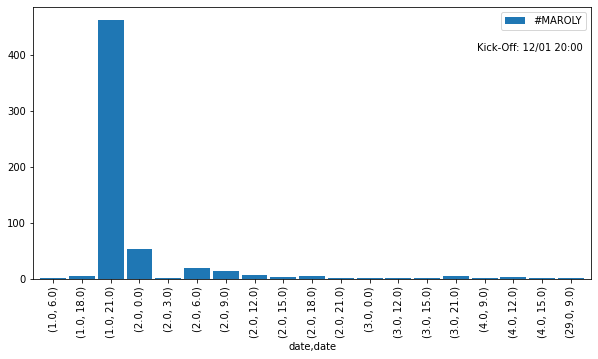

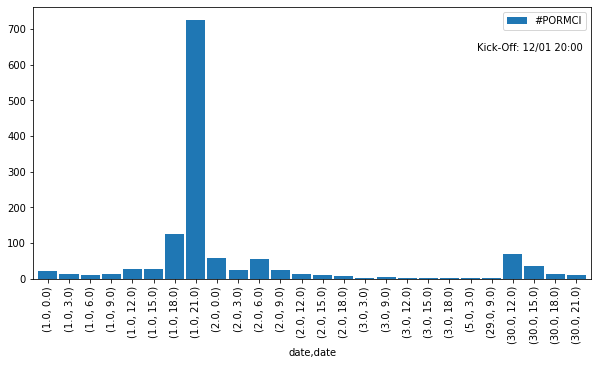

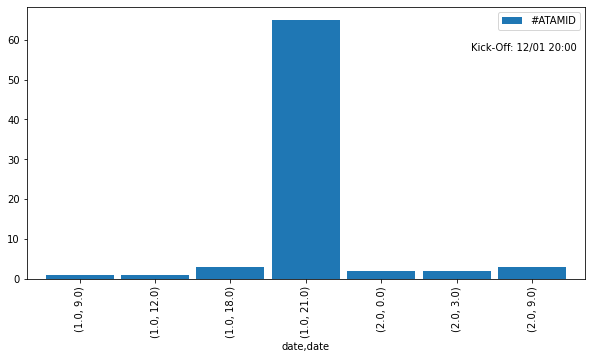

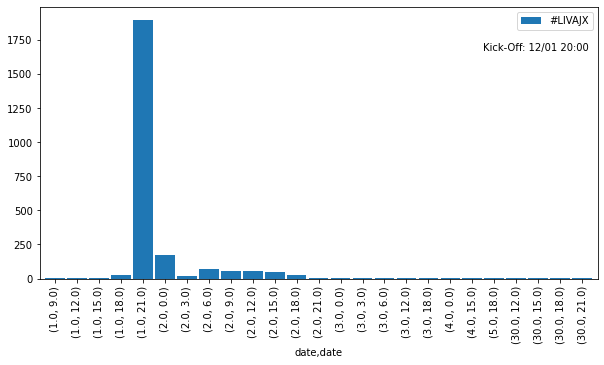

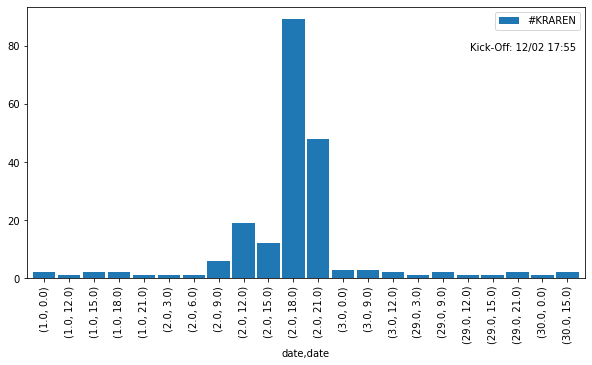

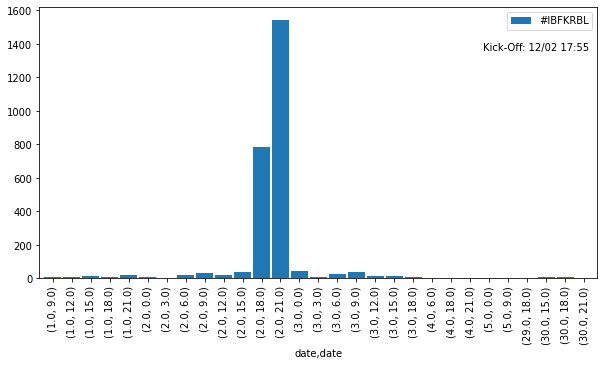

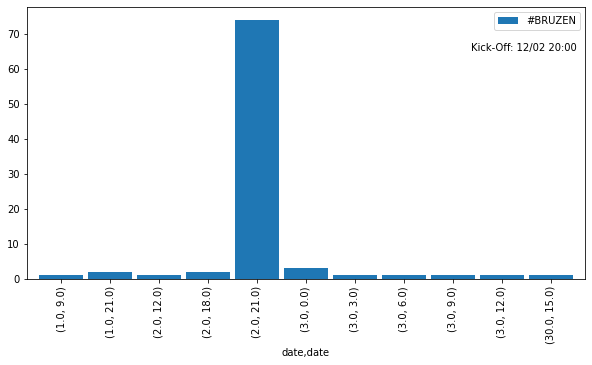

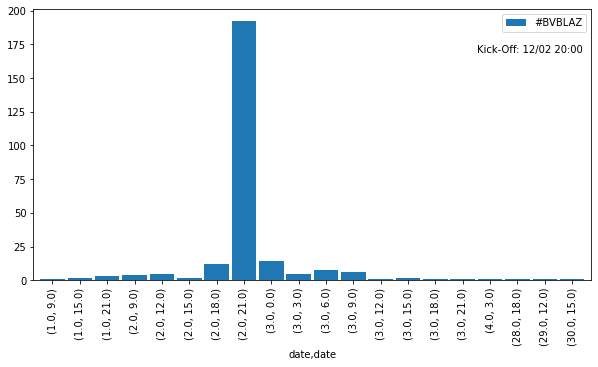

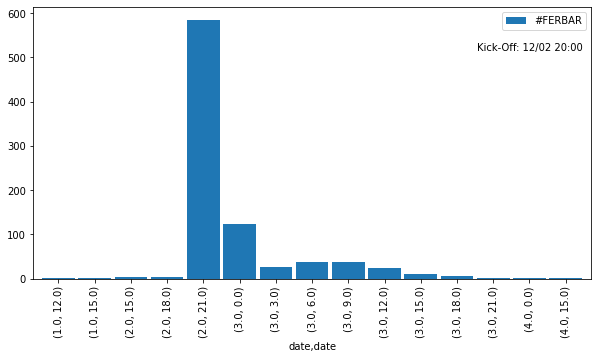

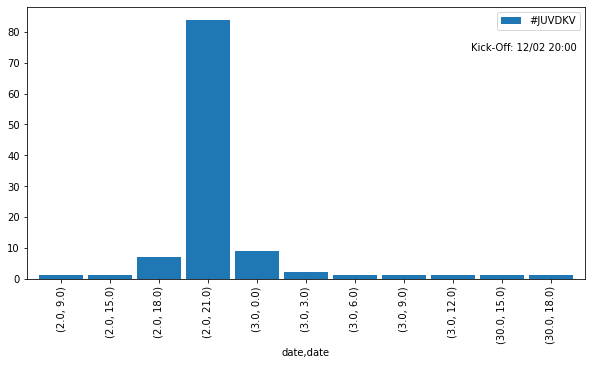

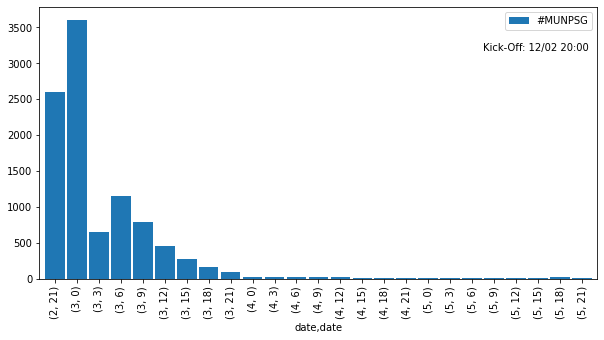

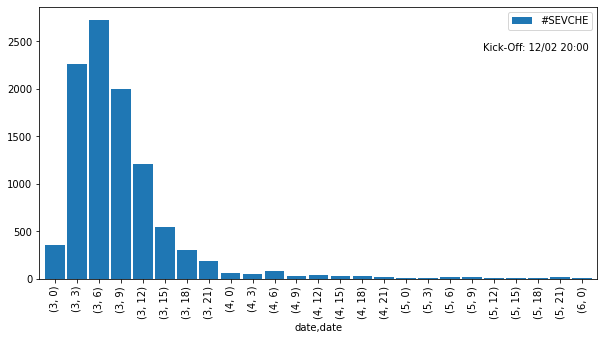

In [10]:
''' For week 2 i.e. matches on the dates 12/01 and 12/02 '''

for match, time in zip(matches2, match_times2):  
    tempDF = tweet_df2[[match]]
    tempDF.rename(columns={match:'date'}, inplace = True)
    # print(tempDF['date'])
    tempDF = tempDF.assign(date=tempDF.date.dt.round('3h'))
    # print(tempDF)
    ax = tempDF.groupby([tempDF["date"].dt.day,tempDF["date"].dt.hour]).count().plot(figsize= (10,5),kind="bar", width= 0.9)
    ax.text(0.89, 0.85, "Kick-Off: " + time , ha='center', va='center', transform=ax.transAxes)
    ax.legend([match,]);
    pathname = "drive/My Drive/Colab Notebooks/SSM Project/Week2_Images/" + match.strip('#') +".png"
    ax.figure.savefig(pathname, bbox_inches="tight")